In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
note_types = pd.read_csv("data/note_type.csv")
note_embeddings = pd.read_csv("data/note_embedding.csv")
data = pd.merge(note_types, note_embeddings, on="note")

In [11]:
notes = data["note"].values
types = data["class"].values
embeddings = data.drop(columns=["note", "class"]).values

In [12]:
similarity_matrix = cosine_similarity(embeddings)

In [13]:
same_class_sims = []
diff_class_sims = []

n = len(notes)
for i in range(n):
    for j in range(i+1, n):
        sim = similarity_matrix[i, j]
        if types[i] == types[j]:
            same_class_sims.append(sim)
        else:
            diff_class_sims.append(sim)

In [14]:
print("Mean cosine similarity (same class):", np.mean(same_class_sims))
print("Mean cosine similarity (different class):", np.mean(diff_class_sims))

Mean cosine similarity (same class): 0.8175085339228632
Mean cosine similarity (different class): 0.05702618394386826


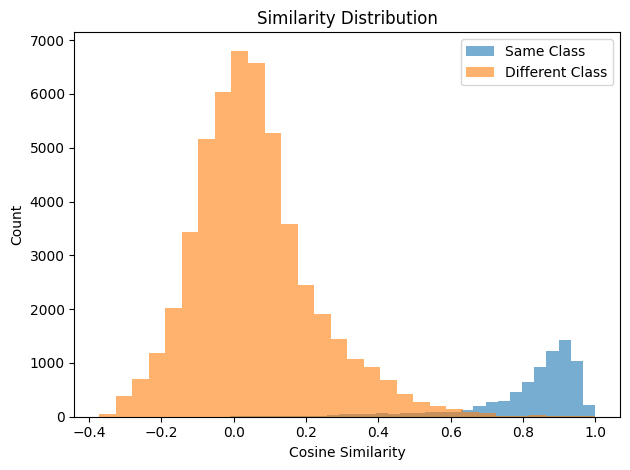

In [15]:
plt.hist(same_class_sims, bins=30, alpha=0.6, label="Same Class")
plt.hist(diff_class_sims, bins=30, alpha=0.6, label="Different Class")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.legend()
plt.title("Similarity Distribution")
plt.tight_layout()
plt.show()

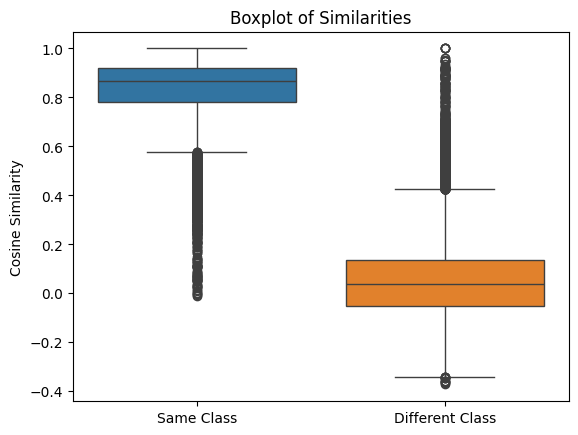

In [16]:
sns.boxplot(data=[same_class_sims, diff_class_sims], orient="v")
plt.xticks([0,1], ["Same Class", "Different Class"])
plt.ylabel("Cosine Similarity")
plt.title("Boxplot of Similarities")
plt.show()

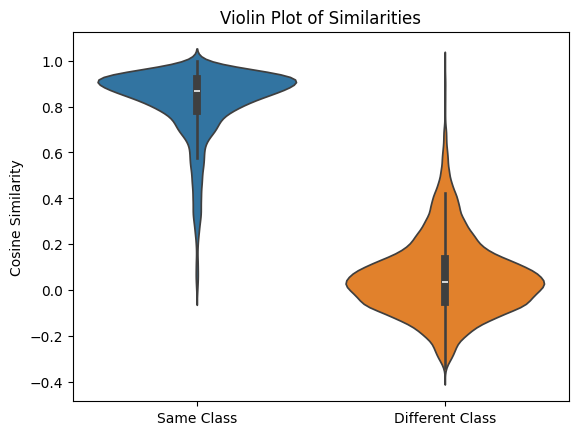

In [19]:
sns.violinplot(data=[same_class_sims, diff_class_sims])
plt.xticks([0,1], ["Same Class", "Different Class"])
plt.ylabel("Cosine Similarity")
plt.title("Violin Plot of Similarities")
plt.savefig("img/Violin_note_embedding_v1.png", dpi=300)
plt.show()

C:\Users\wilson\AppData\Local\Temp\ipykernel_27168\4039201461.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(same_class_sims, label="Same Class", shade=True)
C:\Users\wilson\AppData\Local\Temp\ipykernel_27168\4039201461.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff_class_sims, label="Different Class", shade=True)


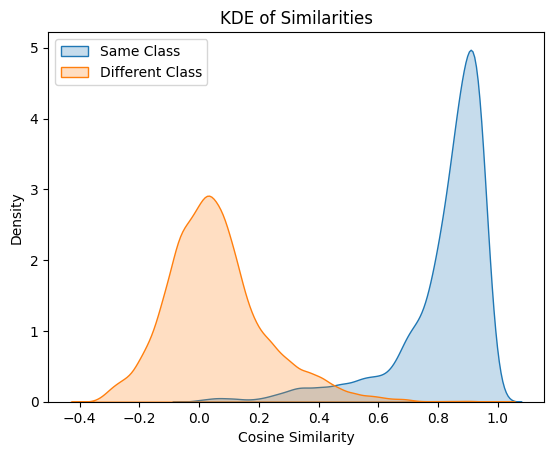

In [20]:
sns.kdeplot(same_class_sims, label="Same Class", shade=True)
sns.kdeplot(diff_class_sims, label="Different Class", shade=True)
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.title("KDE of Similarities")
plt.legend()
plt.savefig("img/KDE_note_embedding_v1.png",dpi=300)
plt.show()